# Fish Market Dataset Exploratory Data Analysis (EDA)

This notebook explores the **Fish Market dataset**, a regression problem focused on predicting fish weight based on various species and dimension measurements (lengths, height, and width). *Note: The code assumes a local CSV file named 'Fish.csv' is available.*

In [2]:
! pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 10.5 MB/s eta 0:00:00m eta 0:00:0101:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 19.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

## 1. Load Data and Initial Exploration

In [4]:
# Load data
def load_fish_market_data():
    # Load from local path - adjust as needed
    try:
        df = pd.read_csv('../../data/Fish.csv')
    except FileNotFoundError:
        print("Error: 'Fish.csv' not found. Please adjust the file path.")
        return None, None, None, None
        
    X = df[['Length1','Length2','Length3','Height','Width']].values
    y = df['Weight'].values
    species = df['Species'].values
    return X, y, species, df

X, y, species, df = load_fish_market_data()
feature_names = ['Length1', 'Length2', 'Length3', 'Height', 'Width']

if df is not None:
    print("=== FISH MARKET DATASET EXPLORATORY ANALYSIS ===")
    print(f"Dataset shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    print(f"Number of features: {len(feature_names)}")
    print(f"Features: {feature_names}")
    print(f"Species: {np.unique(species)}")
    print(f"Problem type: Regression")

=== FISH MARKET DATASET EXPLORATORY ANALYSIS ===
Dataset shape: (159, 5)
Target shape: (159,)
Number of features: 5
Features: ['Length1', 'Length2', 'Length3', 'Height', 'Width']
Species: ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
Problem type: Regression


## 2. Basic Statistics and Data Quality Checks

In [5]:
if df is not None:
    # Basic statistics
    print("\n=== BASIC STATISTICS ===")
    print("Features statistics:")
    print(df[feature_names].describe())

    print("\nTarget statistics:")
    print(f"Mean: {y.mean():.2f} grams")
    print(f"Std: {y.std():.2f} grams")
    print(f"Min: {y.min():.2f} grams")
    print(f"Max: {y.max():.2f} grams")
    print(f"Median: {np.median(y):.2f} grams")

    # Check for missing values
    print("\n=== MISSING VALUES ===")
    print(f"Missing values in features: {df.isnull().sum().sum()}")
    print(f"Missing values in target: {pd.isnull(y).sum()}")

    # Check for infinite values
    print("\n=== INFINITE VALUES ===")
    print(f"Infinite values in features: {np.isinf(X).sum()}")
    print(f"Infinite values in target: {np.isinf(y).sum()}")

    # Check for zero or negative values
    print("\n=== ZERO/NEGATIVE VALUES CHECK ===")
    for i, feature in enumerate(feature_names):
        zero_count = (X[:, i] <= 0).sum()
        if zero_count > 0:
            print(f"  {feature}: {zero_count} zero/negative values")
    
    zero_weight_count = (y <= 0).sum()
    if zero_weight_count > 0:
        print(f" Weight: {zero_weight_count} zero/negative values")


=== BASIC STATISTICS ===
Features statistics:
          Length1     Length2     Length3      Height       Width
count  159.000000  159.000000  159.000000  159.000000  159.000000
mean    26.247170   28.415723   31.227044    8.970994    4.417486
std      9.996441   10.716328   11.610246    4.286208    1.685804
min      7.500000    8.400000    8.800000    1.728400    1.047600
25%     19.050000   21.000000   23.150000    5.944800    3.385650
50%     25.200000   27.300000   29.400000    7.786000    4.248500
75%     32.700000   35.500000   39.650000   12.365900    5.584500
max     59.000000   63.400000   68.000000   18.957000    8.142000

Target statistics:
Mean: 398.33 grams
Std: 356.85 grams
Min: 0.00 grams
Max: 1650.00 grams
Median: 273.00 grams

=== MISSING VALUES ===
Missing values in features: 0
Missing values in target: 0

=== INFINITE VALUES ===
Infinite values in features: 0
Infinite values in target: 0

=== ZERO/NEGATIVE VALUES CHECK ===
 Weight: 1 zero/negative values


In [6]:
# Investigate 0 weight sample
df['Weight'] = y

df[df['Weight'] == 0]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


## 3. Species and Target Distribution


=== SPECIES DISTRIBUTION ===


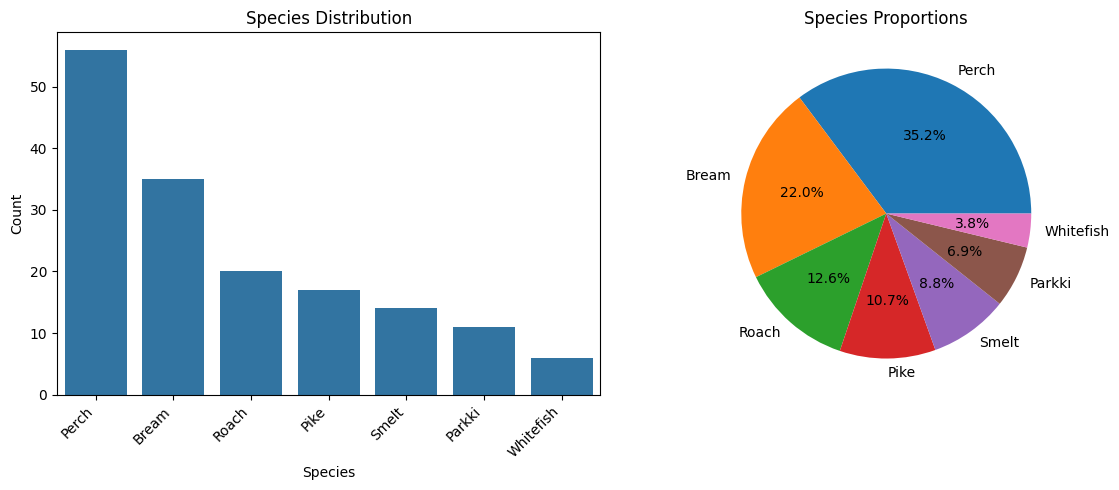


=== WEIGHT DISTRIBUTION ===


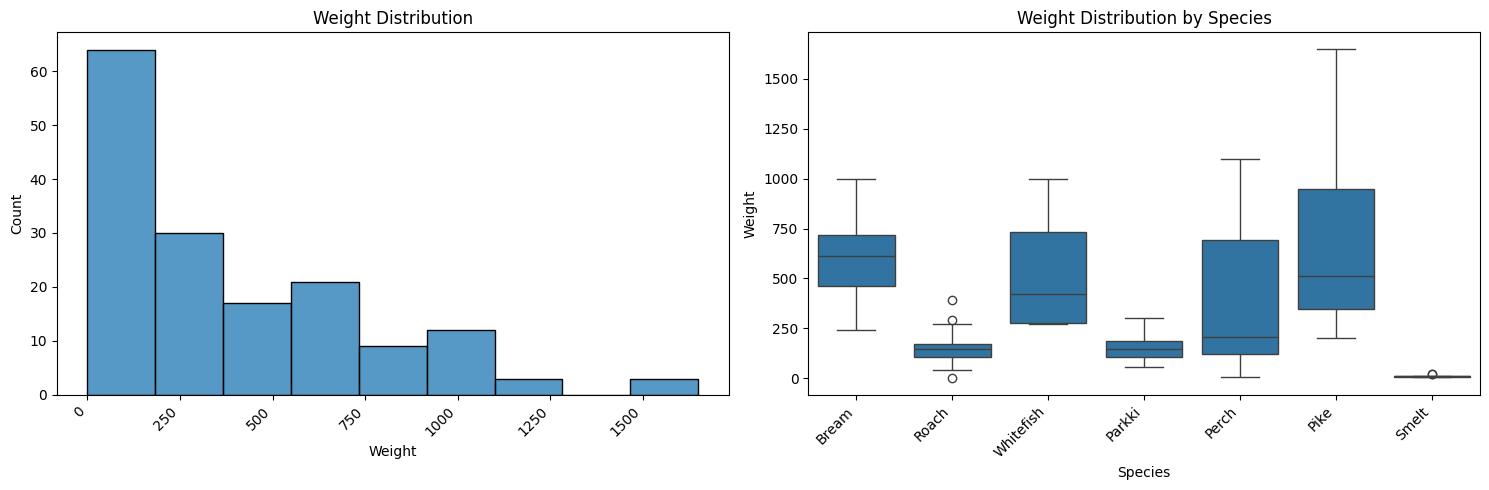

In [7]:
if df is not None:
    # Species distribution
    print("\n=== SPECIES DISTRIBUTION ===")
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    species_counts = df['Species'].value_counts()
    sns.barplot(x=species_counts.index, y=species_counts.values)
    plt.title('Species Distribution')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    plt.pie(species_counts.values, labels=species_counts.index, autopct='%1.1f%%')
    plt.title('Species Proportions')

    plt.tight_layout()
    plt.show()

    # Target distribution
    print("\n=== WEIGHT DISTRIBUTION ===")
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x='Weight')
    plt.title('Weight Distribution')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='Species', y='Weight')
    plt.title('Weight Distribution by Species')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

## 4. Feature Distributions and Correlation


=== FEATURE DISTRIBUTIONS ===


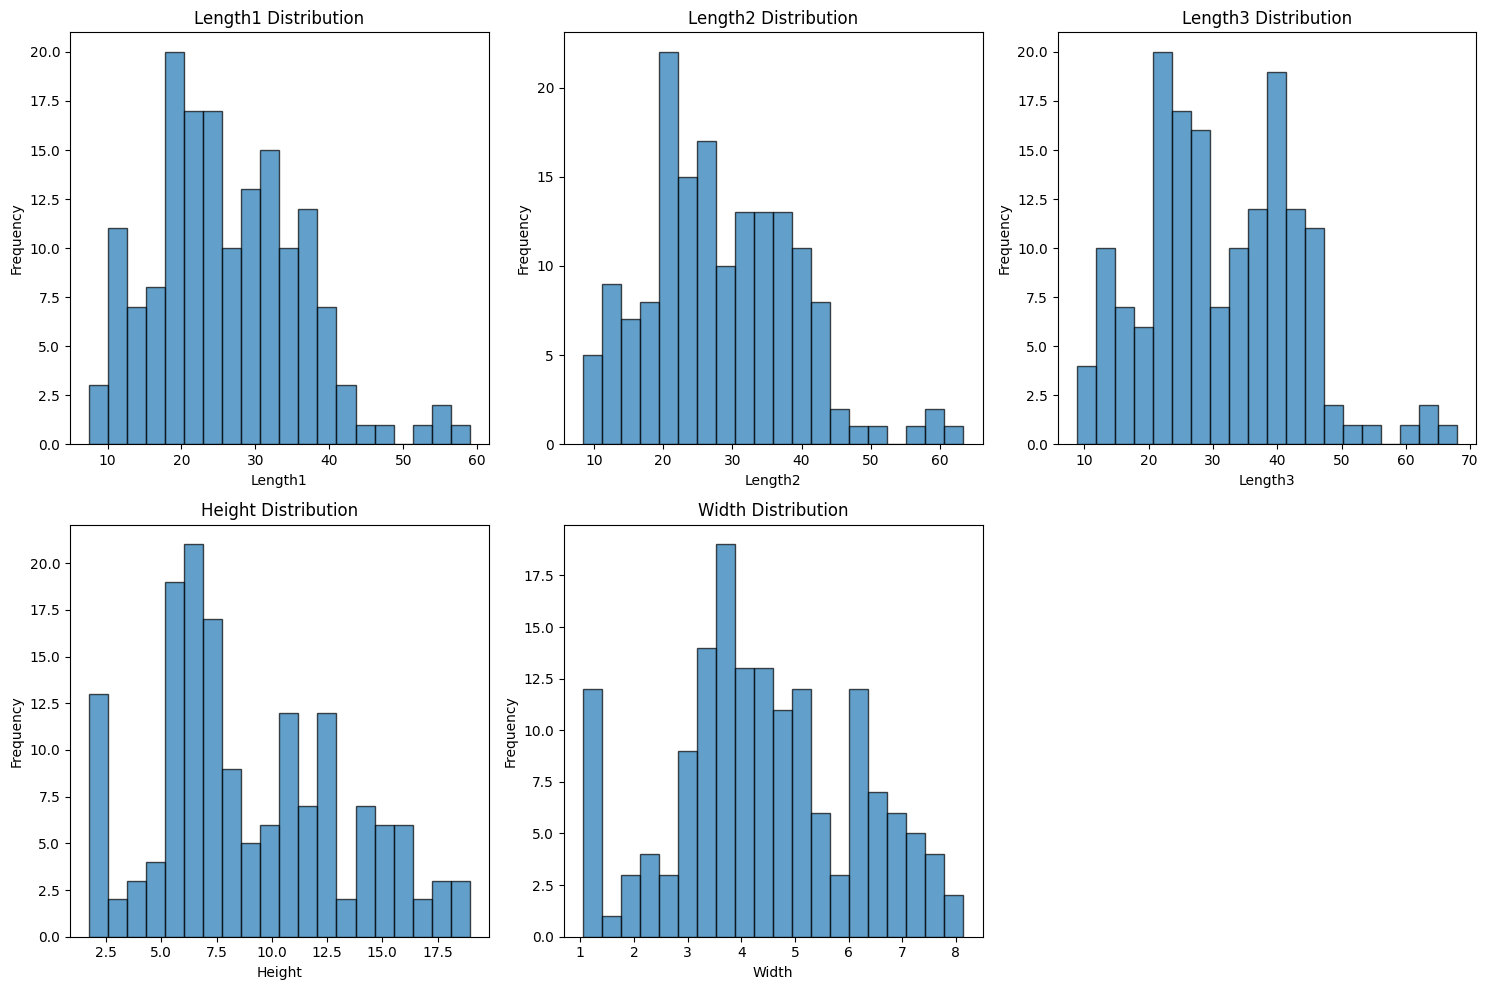


=== CORRELATION ANALYSIS ===


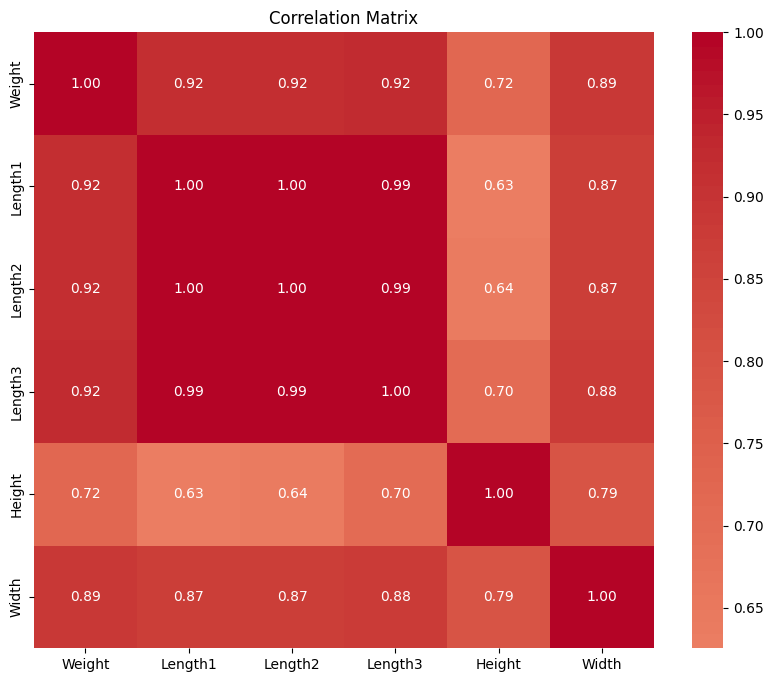

In [8]:
if df is not None:
    # Feature distributions
    print("\n=== FEATURE DISTRIBUTIONS ===")
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(feature_names):
        plt.subplot(2, 3, i+1)
        plt.hist(X[:, i], bins=20, alpha=0.7, edgecolor='black')
        plt.title(f'{feature} Distribution')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Correlation analysis
    print("\n=== CORRELATION ANALYSIS ===")
    corr_matrix = df[['Weight'] + feature_names].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Correlation Matrix')
    plt.show()

## 5. Feature vs Target Relationships and Multicollinearity


=== FEATURE VS TARGET RELATIONSHIPS ===


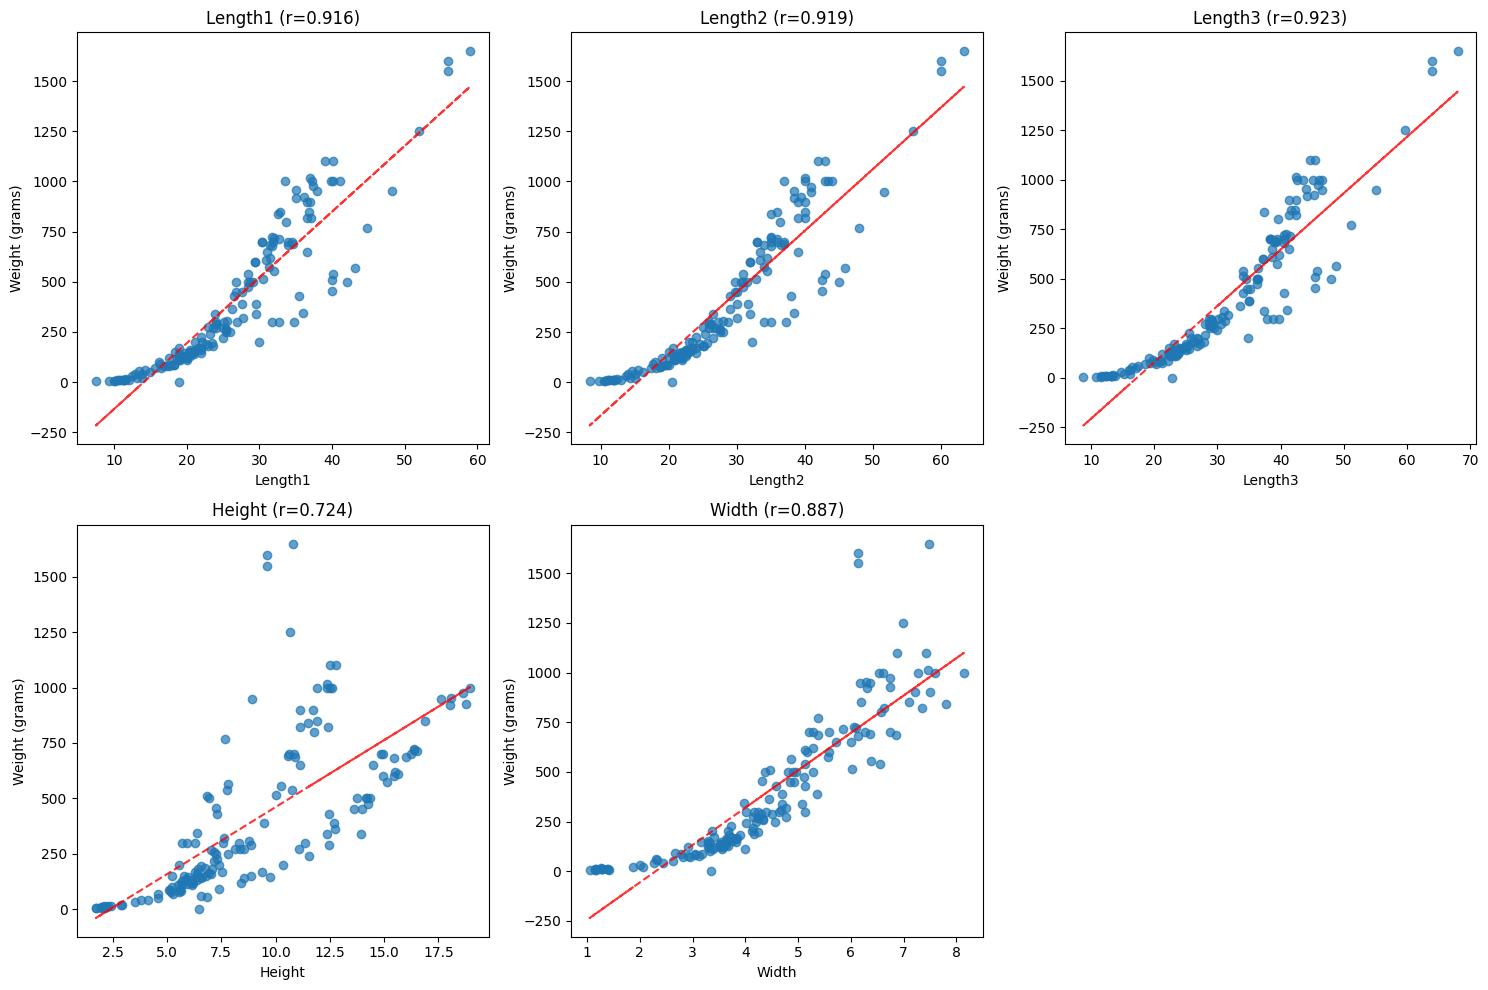

In [10]:
if df is not None:
    # Feature relationships with target
    print("\n=== FEATURE VS TARGET RELATIONSHIPS ===")
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(feature_names):
        plt.subplot(2, 3, i+1)
        plt.scatter(X[:, i], y, alpha=0.7)
        plt.xlabel(feature)
        plt.ylabel('Weight (grams)')
        
        # Add trend line
        z = np.polyfit(X[:, i], y, 1)
        p = np.poly1d(z)
        plt.plot(X[:, i], p(X[:, i]), "r--", alpha=0.8)
        
        # Calculate correlation
        corr = np.corrcoef(X[:, i], y)[0, 1]
        plt.title(f'{feature} (r={corr:.3f})')
    plt.tight_layout()
    plt.show()

## 6. Outlier detection


=== OUTLIER DETECTION ===


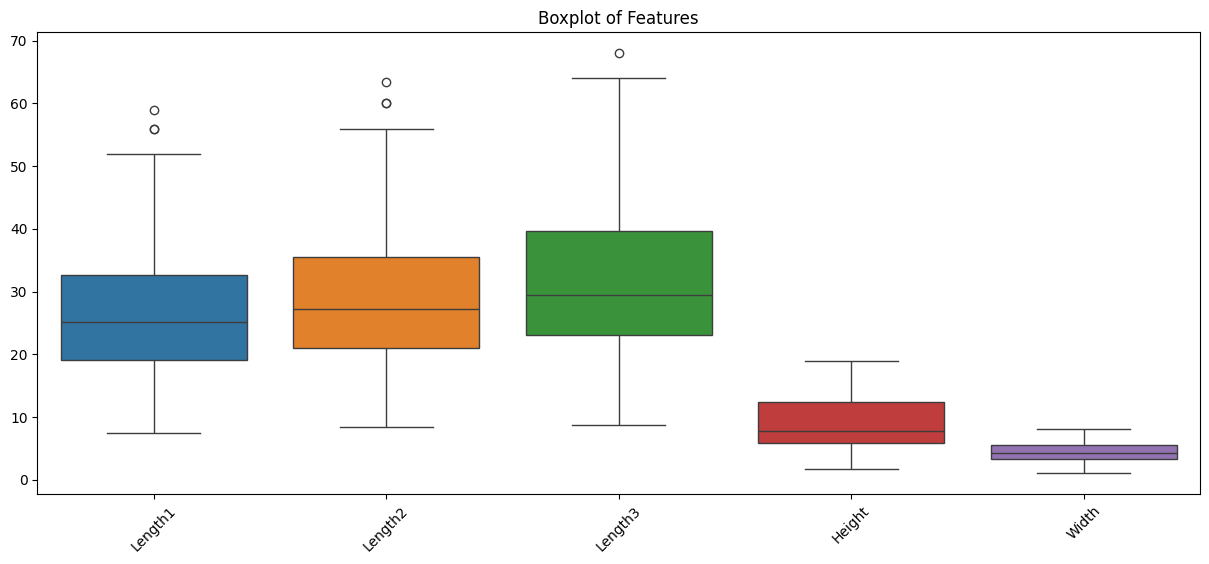

In [12]:
if df is not None:
    # Outlier detection
    print("\n=== OUTLIER DETECTION ===")
    plt.figure(figsize=(15, 6))
    df_features = df[feature_names]
    sns.boxplot(data=df_features)
    plt.title('Boxplot of Features')
    plt.xticks(rotation=45)
    plt.show()

